## 데이터 라벨링

데이터 라벨 일단 7개로 설정

원하는 라벨들 : 사랑, 이별, 여행, 신남, 망해라, 스웨거, etc

### 인덱스 처리

In [1]:
import re
import pandas as pd

In [2]:
pd.set_option('display.max_row', None)

In [3]:
df = pd.read_csv('data_10000.csv')

df.head()

,ranking,title,artist,album,likes,date,lyrics
0,1,아무노래,지코 (ZICO),아무노래,"206,533",2020.01.13,왜들 그리 다운돼있어<br/>뭐가 문제야 say something<br/>분위기가 ...
1,2,ON,방탄소년단,MAP OF THE SOUL : 7,"163,583",2020.02.21,I can't understand what people are sayin'<br/>...
2,3,METEOR,창모 (CHANGMO),Boyhood,"192,704",2019.11.29,Yeah ha<br/>Yeah ha<br/>Yeah ha<br/>Yeah ha<br...
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7,"171,105",2020.01.17,Do your thang<br/>Do your thang with me now<br...
4,5,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7,"119,349",2020.02.21,그런 날 있잖아<br/>이유 없이 슬픈 날<br/>몸은 무겁고<br/>나 빼곤 모두...


In [4]:
print('Before filtering : ', len(df))

index = []

for i in range(len(df)) :
    if df.loc[i, 'lyrics'] == '가사가 없습니다' : index.append(i)

df_ = df.drop(index)
print('After filtering : ', len(df_))

Before filtering :  10000
After filtering :  9190


In [5]:
df_.to_csv('drop_10000.csv', index = False)

### 데이터 처리

In [6]:
df = pd.read_csv('drop_10000.csv')

train = df[:]

In [7]:
train['new_lyrics'] = None

train.head(3)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ranking,title,artist,album,likes,date,lyrics,new_lyrics
0,1,아무노래,지코 (ZICO),아무노래,"206,533",2020.01.13,왜들 그리 다운돼있어<br/>뭐가 문제야 say something<br/>분위기가 ...,None
1,2,ON,방탄소년단,MAP OF THE SOUL : 7,"163,583",2020.02.21,I can't understand what people are sayin'<br/>...,None
2,3,METEOR,창모 (CHANGMO),Boyhood,"192,704",2019.11.29,Yeah ha<br/>Yeah ha<br/>Yeah ha<br/>Yeah ha<br...,None


In [8]:
def clean_text(text) : 
    stopword_df = pd.read_csv('stopwords.csv', header = None)
    stopwords = [stopword for stopword in stopword_df[0]]
    
    text = re.sub('<br/>', ' ', text)
    text = re.sub('[A-Za-z]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('#+', '##', text)
    text = re.sub('’', '', text)
    text = re.sub(' +', ' ', text)
    
    list_of_words = text.split(' ')    
    list_of_words = [word for word in list_of_words if word not in stopwords] 
    
    text = ' '.join(list_of_words).strip()
    
    return text

In [9]:
for i in range(len(train)) : 
    train.loc[i, 'new_lyrics'] = clean_text(train.loc[i, 'lyrics'])
    
train.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ranking,title,artist,album,likes,date,lyrics,new_lyrics
0,1,아무노래,지코 (ZICO),아무노래,"206,533",2020.01.13,왜들 그리 다운돼있어<br/>뭐가 문제야 say something<br/>분위기가 ...,왜들 그리 다운돼있어 뭐가 문제야 분위기가 겁나 싸해 요새는 이런 게 유행인가 왜들...
1,2,ON,방탄소년단,MAP OF THE SOUL : 7,"163,583",2020.02.21,I can't understand what people are sayin'<br/>...,어느 장단에 맞춰야 될지 한 발자국 떼면 한 발자국 커지는 잠에서 눈을 뜬 여긴 또...
2,3,METEOR,창모 (CHANGMO),Boyhood,"192,704",2019.11.29,Yeah ha<br/>Yeah ha<br/>Yeah ha<br/>Yeah ha<br...,모두 그에게 말해 또 왔네 새꺄 죽지 않고 왔다 이렇게 새꺄 뭐 라인을 빌릴래 했어...
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7,"171,105",2020.01.17,Do your thang<br/>Do your thang with me now<br...,심장이 뛰지 않는대 더는 음악을 때 시간이 멈춘 듯해 이게 나를 못 울린다면 내 가...
4,5,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7,"119,349",2020.02.21,그런 날 있잖아<br/>이유 없이 슬픈 날<br/>몸은 무겁고<br/>나 빼곤 모두...,그런 있잖아 이유 없이 슬픈 몸은 무겁고 나 빼곤 모두 다 바쁘고 치열해 보이는 발...


####  토크나이저1 (Okt)

In [10]:
from konlpy.tag import Okt

okt = Okt()

def okt_tokenizer(text) :
    stopword_df = pd.read_csv('stopwords.csv', header = None)
    stopwords = [stopword for stopword in stopword_df[0]]
    
    tokens = okt.morphs(text, stem = True)
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

#### 토크나이저2 (Lemmatize)

In [11]:
import nltk

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token,'v') for token in tokens]

def LemNormalize(text) : 
    return LemTokens(nltk.word_tokenize(text))

### 시각화하기

min_df와 max_df가 어떤 값이 좋은지 고민해보다가 해봤는데 큰 의미 없는 듯

In [12]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline

def plot_document_frequency_dist(lyrics, min_df=2, max_df=10000):
    dictionary = dict()

    words = okt.morphs(lyrics, stem = True)

    for word in words:
        if word in dictionary.keys():
            dictionary[word] += 1
        else:
            dictionary[word] = 1

    vs = sorted(list(dictionary.values()))
    if min_df < 1: # 1보다 작을 경우에는 전체 문서에 등장하는 비율로 계산함
        min_df = round(len(words)*min_df)
    if max_df < 1: # 1보다 작을 경우에는 전체 문서에 등장하는 비율로 계산함
        max_df = round(len(words)*max_df)
    if min_df > max_df: # min_df 가 max_df보다 작아야 함. 
        print("min_df({}) is bigger than max_df({})".format(min_df, max_df))
        return None
    for k,v in dictionary.copy().items():
        if v<min_df or max_df<v:
            del dictionary[k]
    print("min_df({}), max_df({})".format(min_df, max_df))
    print("length of vocab: {}".format(len(dictionary.values())))

    vs = sorted(list(dictionary.values()))

    fig = plt.figure(figsize=(15, 3))
    gs = gridspec.GridSpec(nrows=1, ncols=2)
    ax0 = plt.subplot(gs[0])
    ax0.plot(vs)
    ax0.set_title("sorted plot")

    ax1 = plt.subplot(gs[1])
    ax1.boxplot(vs, vert=False, notch=True, whis=2.0)
    ax1.set_title('box-plot')
    plt.show()
    return fig

min_df(7), max_df(646)
length of vocab: 12


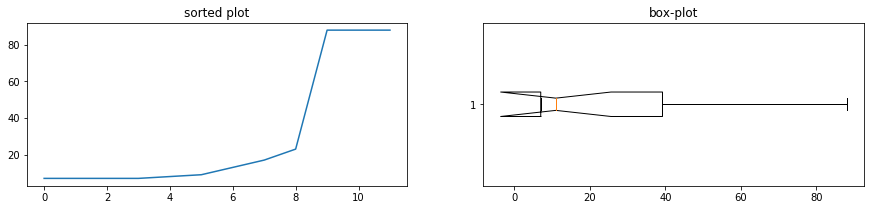

min_df(22), max_df(503)
length of vocab: 4


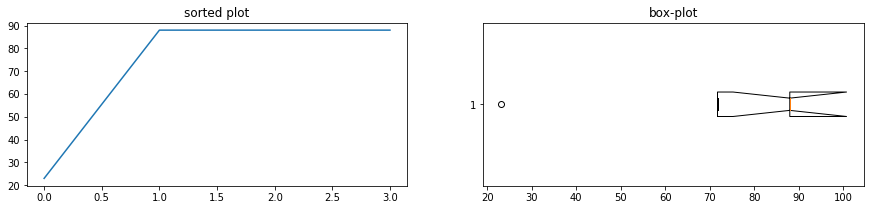

min_df(36), max_df(359)
length of vocab: 3


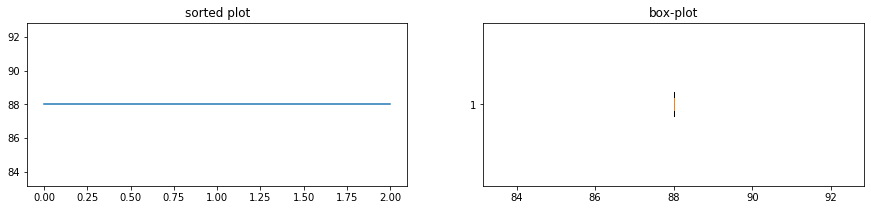

min_df(8), max_df(751)
length of vocab: 17


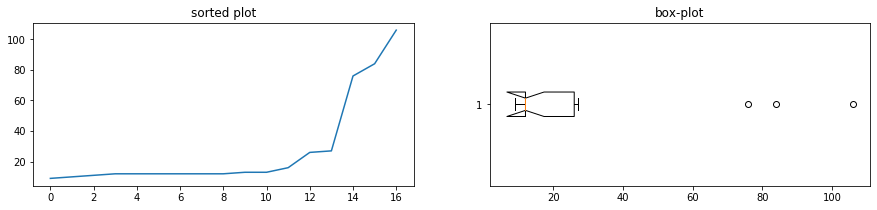

min_df(25), max_df(584)
length of vocab: 5


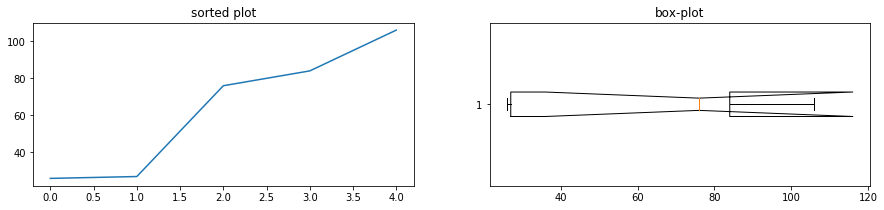

min_df(42), max_df(417)
length of vocab: 3


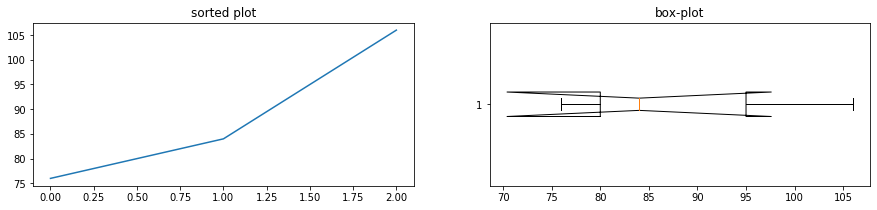

min_df(6), max_df(564)
length of vocab: 10


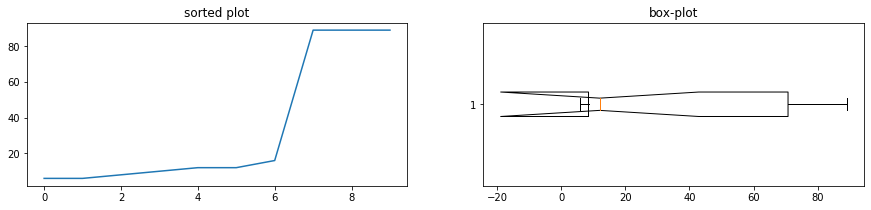

min_df(19), max_df(439)
length of vocab: 3


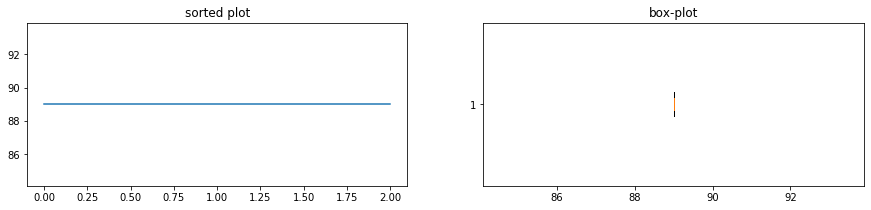

min_df(31), max_df(314)
length of vocab: 3


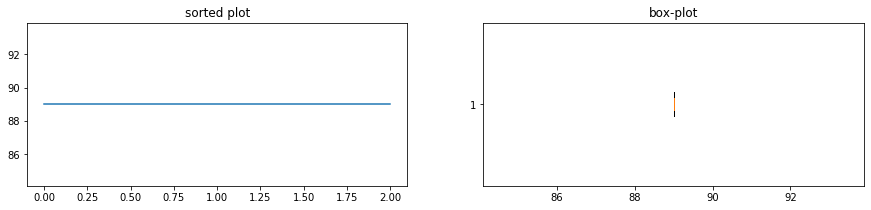

min_df(7), max_df(670)
length of vocab: 16


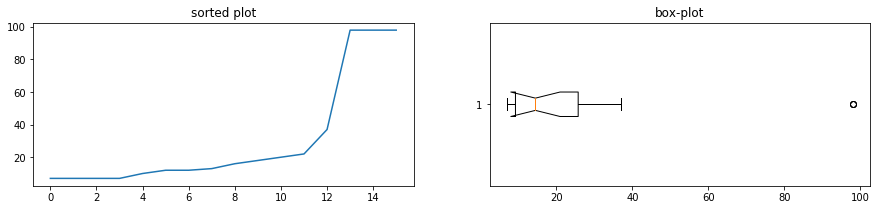

min_df(22), max_df(522)
length of vocab: 5


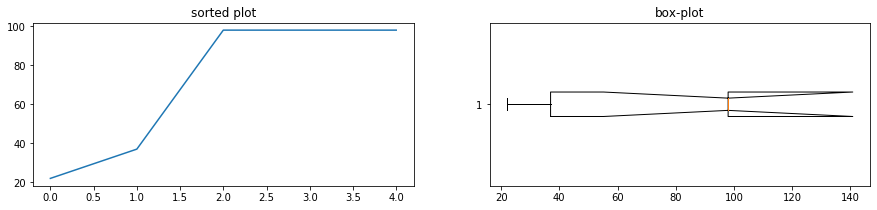

min_df(37), max_df(372)
length of vocab: 4


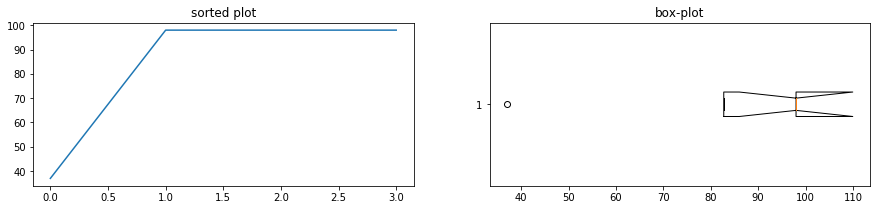

min_df(6), max_df(576)
length of vocab: 11


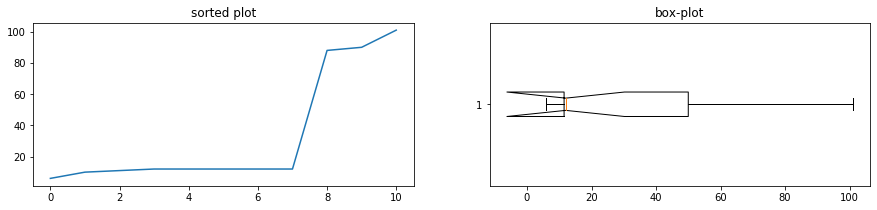

min_df(19), max_df(448)
length of vocab: 3


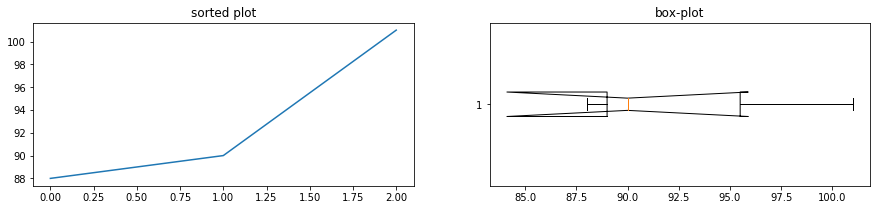

min_df(32), max_df(320)
length of vocab: 3


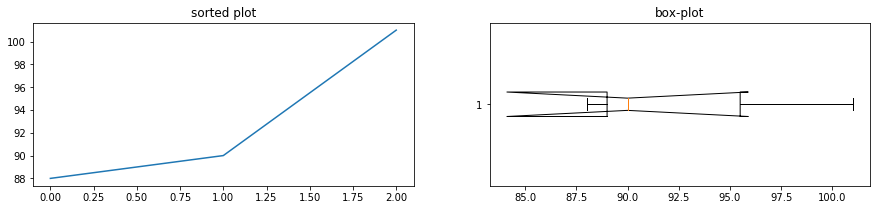

min_df(6), max_df(495)
length of vocab: 11


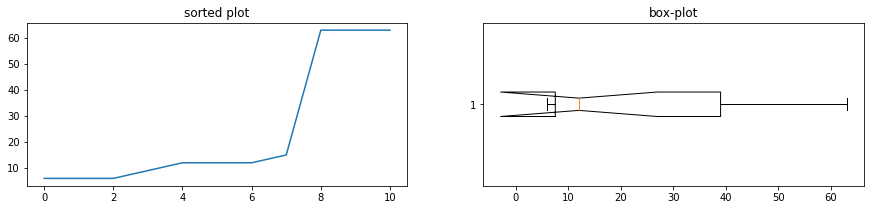

min_df(16), max_df(385)
length of vocab: 3


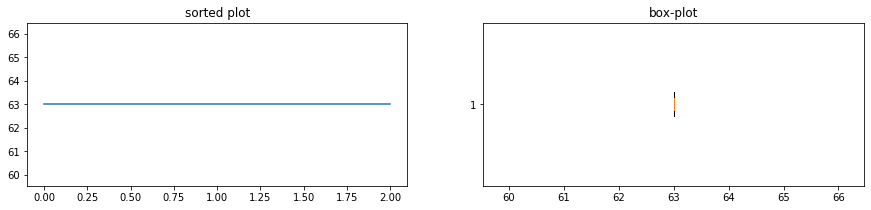

min_df(28), max_df(275)
length of vocab: 3


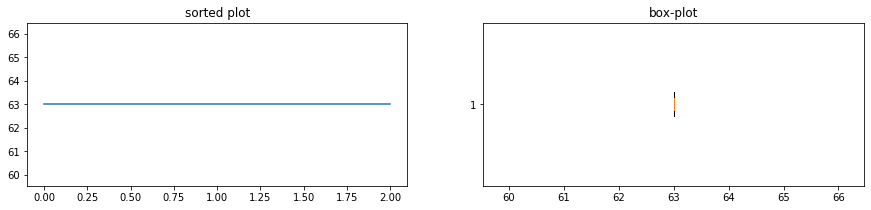

min_df(5), max_df(446)
length of vocab: 14


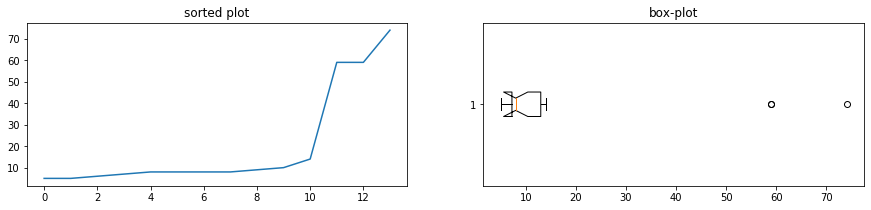

min_df(15), max_df(346)
length of vocab: 3


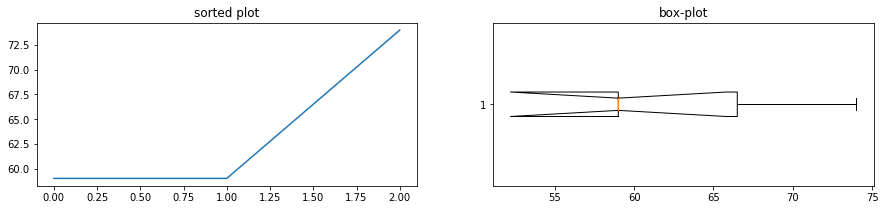

min_df(25), max_df(248)
length of vocab: 3


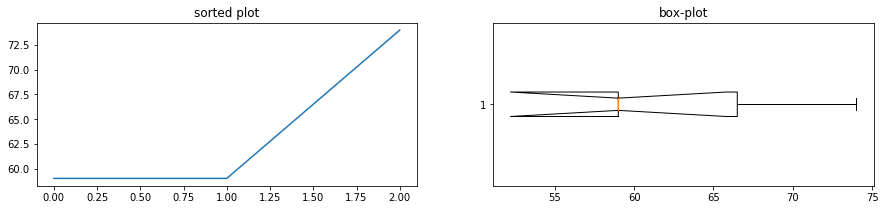

min_df(13), max_df(1149)
length of vocab: 9


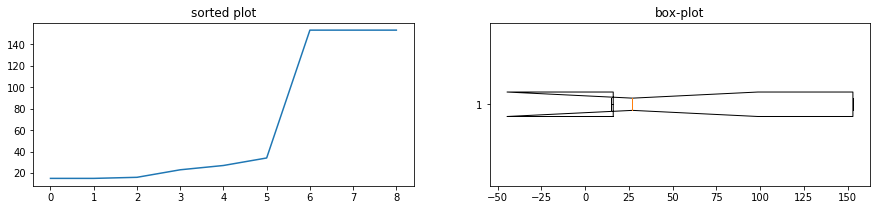

min_df(38), max_df(894)
length of vocab: 3


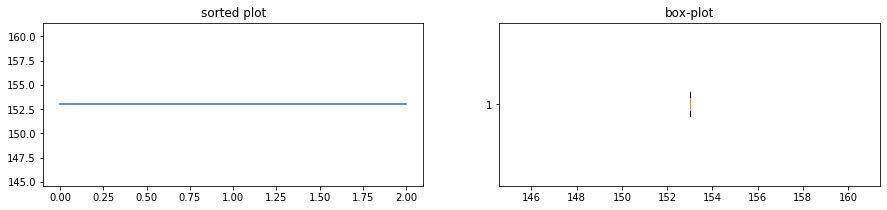

min_df(64), max_df(638)
length of vocab: 3


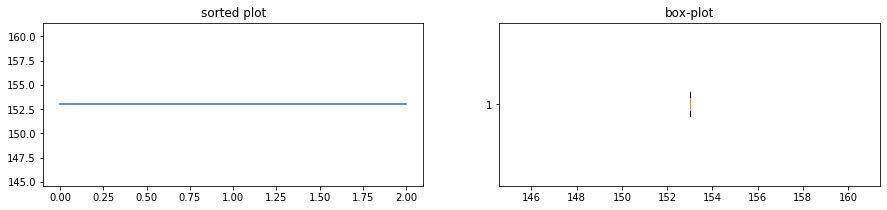

min_df(4), max_df(371)
length of vocab: 19


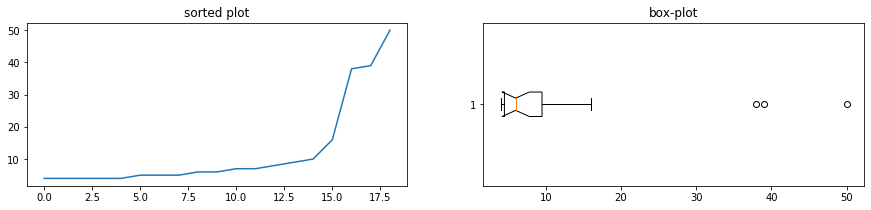

min_df(12), max_df(288)
length of vocab: 4


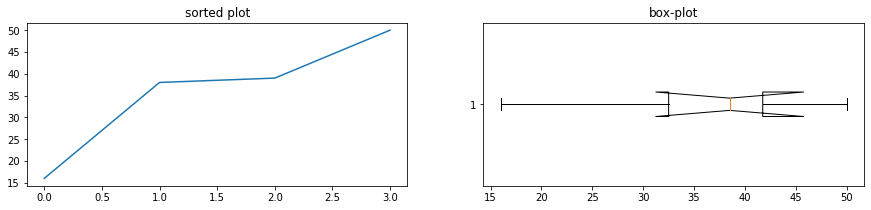

min_df(21), max_df(206)
length of vocab: 3


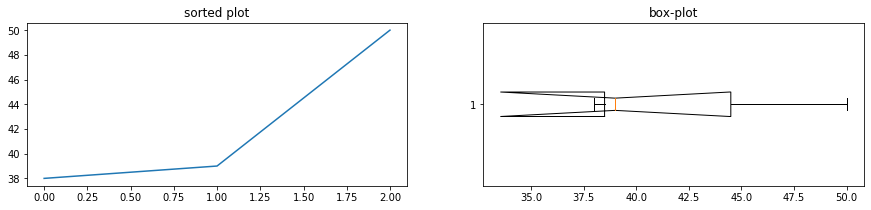

In [13]:
for i in range(int(len(train)/1000)) : 
    for j in range(3):
        plot_document_frequency_dist(train.loc[i, 'lyrics'], min_df = 0.01 + (j*0.02), max_df = 0.9 - (j*0.2))

### Tf-Idf 적용하기

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range = (1, 2), min_df = 0.05, max_df = 0.5)
feature_vect = tfidf_vect.fit_transform(train['new_lyrics'])

### K-Means 적용하기

In [25]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 42)
km_cluster.fit(feature_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [26]:
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [27]:
train['label'] = cluster_label

train.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ranking,title,artist,album,likes,date,lyrics,new_lyrics,label
0,1,아무노래,지코 (ZICO),아무노래,"206,533",2020.01.13,왜들 그리 다운돼있어<br/>뭐가 문제야 say something<br/>분위기가 ...,왜들 그리 다운돼있어 뭐가 문제야 분위기가 겁나 싸해 요새는 이런 게 유행인가 왜들...,1
1,2,ON,방탄소년단,MAP OF THE SOUL : 7,"163,583",2020.02.21,I can't understand what people are sayin'<br/>...,어느 장단에 맞춰야 될지 한 발자국 떼면 한 발자국 커지는 잠에서 눈을 뜬 여긴 또...,2
2,3,METEOR,창모 (CHANGMO),Boyhood,"192,704",2019.11.29,Yeah ha<br/>Yeah ha<br/>Yeah ha<br/>Yeah ha<br...,모두 그에게 말해 또 왔네 새꺄 죽지 않고 왔다 이렇게 새꺄 뭐 라인을 빌릴래 했어...,2
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7,"171,105",2020.01.17,Do your thang<br/>Do your thang with me now<br...,심장이 뛰지 않는대 더는 음악을 때 시간이 멈춘 듯해 이게 나를 못 울린다면 내 가...,2
4,5,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7,"119,349",2020.02.21,그런 날 있잖아<br/>이유 없이 슬픈 날<br/>몸은 무겁고<br/>나 빼곤 모두...,그런 있잖아 이유 없이 슬픈 몸은 무겁고 나 빼곤 모두 다 바쁘고 치열해 보이는 발...,2


### 결과 출력

In [28]:
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features = 10) :
    cluster_details = dict()
    
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    for cluster_num in range(cluster_num) :
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_feature_indexes'] = top_feature_indexes
        
        title = cluster_data[cluster_data['label'] == cluster_num]['title']
        title = title.values.tolist()
        
        cluster_details[cluster_num]['title'] = title
    return cluster_details

In [29]:
def print_cluster_details(cluster_details) :
    for cluster_num, cluster_detail in cluster_details.items() :
        print('##########Cluster{0}##########'.format(cluster_num))
        print('Title : ', cluster_detail['title'][:20])
        print('Top_features : ', cluster_detail['top_features'])
        print('-'*138)        

In [30]:
feature_names = tfidf_vect.get_feature_names()

In [31]:
cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = train[['title', 'new_lyrics', 'label']], 
                                      feature_names = feature_names, cluster_num = 5, top_n_features = 10)

In [32]:
print_cluster_details(cluster_details)

##########Cluster0##########
Title :  ['어떻게 지내', 'Filter', 'Moon', 'Inner Child', 'Louder than bombs', '봄날', 'Nerdy Love (Feat. 백예린)', '아름다워', 'Amanda (Feat. Simon Dominic) (Prod. By UNTITLEDS)', '샤넬 (Feat. 박봄)', '우연히 봄', '지구는 멸망하지 않아', 'DNA', 'REMEDY (Feat. 청하 (CHUNG HA))', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)', 'And July (Feat. DEAN, DJ Friz)', '어땠을까 (Feat. 박정현)', '대충 입고 나와', '와츠롱 (Feat. YUNHWAY)', '술이 달다 (Feat. Crush)']
Top_features :  ['넌', '널', '니', '너 와', '와', '싶다', '우리', '돼다', '내다', '맘']
------------------------------------------------------------------------------------------------------------------------------------------
##########Cluster1##########
Title :  ['아무노래', '친구', 'We are Bulletproof : the Eternal', '영웅 (英雄; Kick It)', '새로이 (prod. Viann)', '인기 (Feat. 송가인, 챈슬러)', 'IDOL', '뿔 (MAD DOG)', 'Selfmade Orange (Feat. SUPERBEE)', 'Dionysus', '하이에나', '이 노래가 클럽에서 나온다면', '호랑이소굴 (Feat. Jvcki Wai)', 'Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트)', '왔다', '가라사대', '뚜두뚜두 (DDU-DU DDU-DU)',

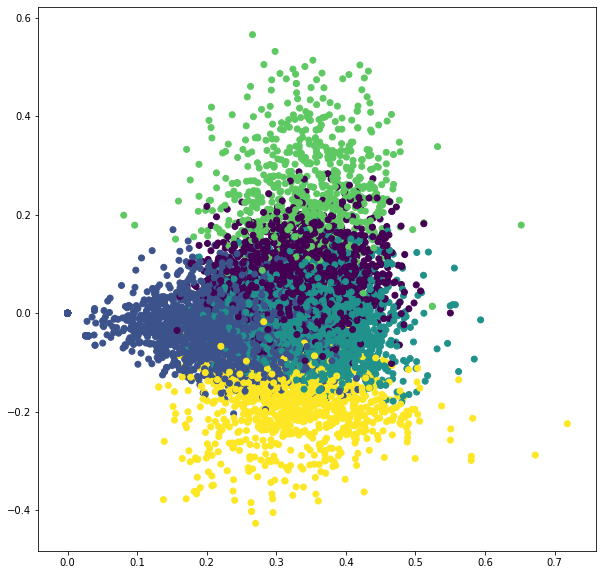

In [33]:
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

tsvd= TruncatedSVD(n_components = 2)
X = tsvd.fit_transform(feature_vect)

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c=cluster_label)
plt.show()